In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sys
import cv2

In [2]:
if not '/Users/mehmetbezcioglu/Documents/SEMESTER1/DeepLearning/one_shot_learning/image_similarity/datasets' in sys.path:
    sys.path.append('/Users/mehmetbezcioglu/Documents/SEMESTER1/DeepLearning/one_shot_learning/image_similarity/datasets')

if not '/Users/mehmetbezcioglu/Documents/SEMESTER1/DeepLearning/one_shot_learning/image_similarity/networks' in sys.path:
    sys.path.append('/Users/mehmetbezcioglu/Documents/SEMESTER1/DeepLearning/one_shot_learning/image_similarity/networks')

In [3]:
import Siamese_Dataset_Loader as Dataset
from Convolutional_Siamese import *

In [6]:
data = Dataset.Loader(n_examples = 20, mode= None,normalise = True)

19280
(964, 20, 105, 105, 1)


In [3]:
def plot(X):
    plt.imshow(X,cmap='gray')
    plt.show()

In [13]:
img_resized = cv2.resize(data.X[0][0],(35,35),cv2.INTER_AREA)

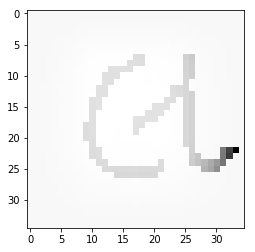

In [16]:
plt.imshow(img_resized,cmap='gray')
plt.show()

In [4]:
import mnist
imgs = mnist.test_images()
labels = mnist.test_labels()

In [5]:
imgs.shape
labels = labels.reshape(1,-1)
print("images.shape: {}".format(imgs.shape))
print("labels.shape: {}".format(labels.shape))

images.shape: (10000, 28, 28)
labels.shape: (1, 10000)


In [6]:
def generateOneShotTrials(X,size):
    '''
    Generates one shot trial for the data given where one one-shot trial is comparing one image against n-images.
    Therefore, comparing 20 different images against 20 images is 20 one-shot trials of each trial being 20-way.

    Arguments:
    data -- shape = (n_chars, n_drawers, 105, 105, 1)

    Returns:
    trainImgs -- shape  (20,105,105,1)
    testImgs -- shape (20,105,105,1)
    labels -- shape(1,20)
    '''
    # print("in function")
    chars = np.random.randint(low= 0,high= X.shape[0],size=size)
    # print()
    # print("Characters drawn:{}".format(chars))
    # print("X[chars].shape: {}".format(X[chars].shape))
    drawers = np.random.randint(low=0 ,high=X[chars].shape[1],size=2) if X.shape[1] > 2 else np.random.permutation(2)
    # print("Drawers drawn:{}".format(drawers))
    testImgs = X[chars,drawers[0]]
    trainImgs = X[chars,drawers[1]]
    #     trainImgs = 
    # print(testImgs.shape)
    # print(trainImgs.shape)
    labels = chars
    #     plt.imshow(testImgs[0].reshape(105,105),cmap='gray')
    #     plt.show()
    #     plt.imshow(testImgs[1].reshape(105,105),cmap='gray')
    #     plt.show()
    #     plt.imshow(trainImgs[0].reshape(105,105),cmap='gray')
    #     plt.show()
    #     plt.imshow(trainImgs[1].reshape(105,105),cmap='gray')
    #     plt.show()

    return (testImgs,trainImgs,labels.reshape(1,size))




In [7]:
labels

array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8)

In [36]:
a = [5,3,6,2,8,4]

#sort the array
for i in range(len(a)):
    min_idx = i
    for j in range(i+1,len(a)):
        if a[min_idx] > a[j]:
            min_idx = j
    a[i],a[min_idx] = a[min_idx],a[i]

In [37]:
a

[2, 3, 4, 5, 6, 8]

In [8]:
#sort the array
for i in range(labels.shape[1]):
    min_idx = i
    for j in range(i+1,labels.shape[1]):
        if labels[0,min_idx] > labels[0,j]:
            min_idx = j
    labels[0,i],labels[0,min_idx] = labels[0,min_idx],labels[0,i]
    temp, imgs[min_idx,:] = imgs[min_idx,:].copy(), imgs[i,:].copy()
    imgs[i,:] = temp

In [9]:
labels

array([[0, 0, 0, ..., 9, 9, 9]], dtype=uint8)

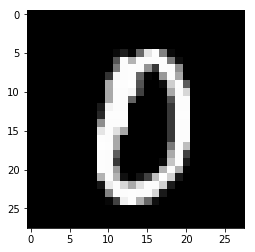

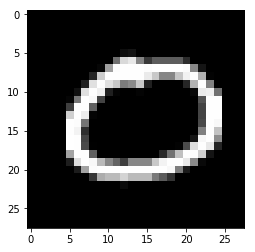

In [10]:
plot(imgs[5])
plot(imgs[6])

# temp = imgs[6].copy()
# imgs[6] = imgs[5].copy()
# imgs[5] = temp

In [19]:
min_length = np.shape(np.argwhere(labels==0))[0]
for i in range(1,10):
    length = np.shape(np.argwhere(labels==i))[0]
    if min_length > length:
        min_length = length
        min_i = i
print(min_length, min_i)

892 5


In [21]:
for i in range(10):
    print("char {} occurences:\t{}".format(i,np.shape(np.argwhere(labels==i))[0]))

char 0 occurences:	980
char 1 occurences:	1135
char 2 occurences:	1032
char 3 occurences:	1010
char 4 occurences:	982
char 5 occurences:	892
char 6 occurences:	958
char 7 occurences:	1028
char 8 occurences:	974
char 9 occurences:	1009


In [57]:
def generate_mnist_data(data,labels,length):
    '''
    for each char:
        get the #occurences
        generate the random int range for size of =length
        write current char into buffer along axis=0
    '''
    buffer = []
    prv_char_occ = 0
    for char in range(10):
        char_occ = np.shape(np.argwhere(labels==char))[0]
        buffer.append(data[np.random.randint(low=prv_char_occ,high=char_occ + prv_char_occ,size=length)])
        prv_char_occ += char_occ
    return np.asarray(buffer)

In [41]:
indices = np.random.randint(low=0,high=980,size=20)
b = []
b.append(imgs[indices])
b.append(imgs[indices])

In [42]:
b = np.asarray(b)
b.shape

(2, 20, 28, 28)

In [68]:
mnist_one_shot = generate_mnist_data(imgs,labels,length = 20)
mnist_one_shot.shape

(10, 20, 28, 28)

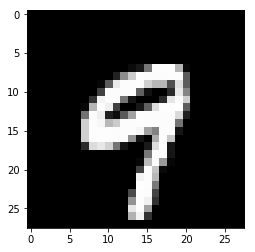

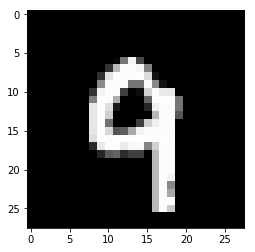

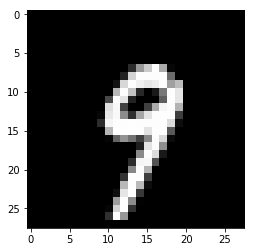

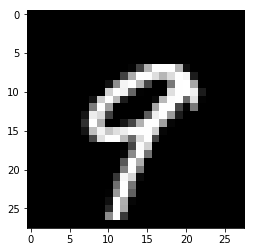

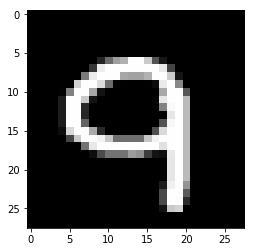

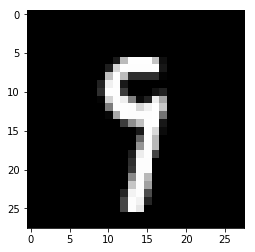

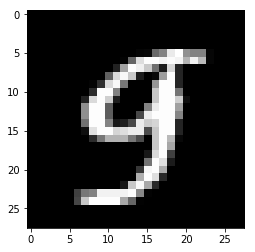

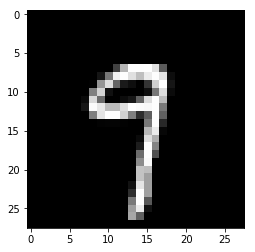

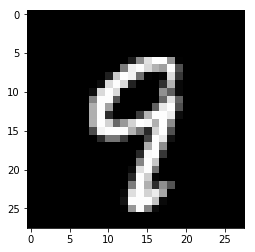

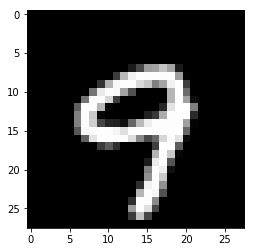

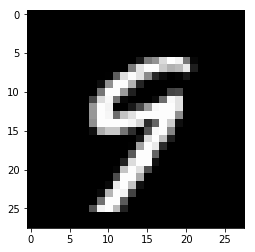

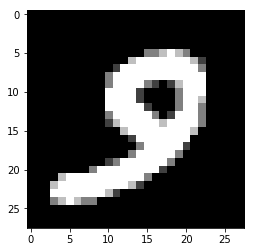

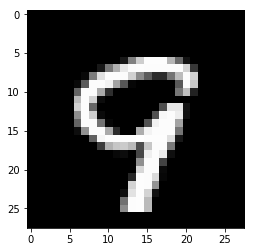

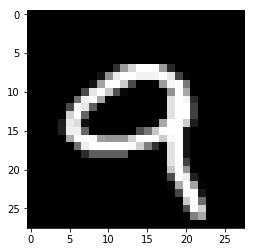

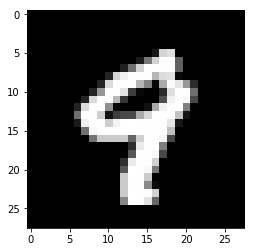

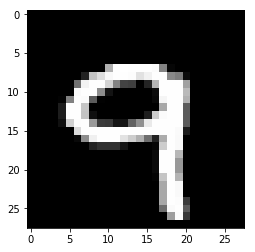

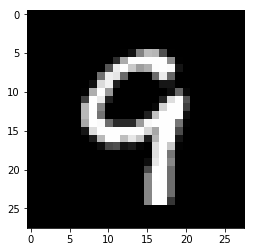

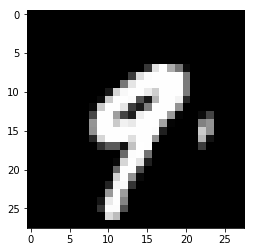

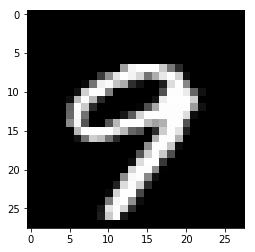

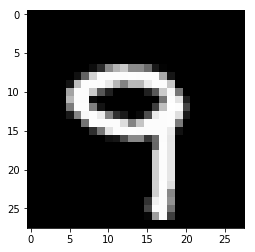

In [69]:
for i in range(20):
    plot(mnist_one_shot[9][i])

In [74]:
img = mnist_one_shot.reshape(-1,28,28,1)
img = tf.image.resize_image_with_crop_or_pad(image=img, target_height=105, target_width=105)

with tf.Session() as sess:
    padded_img = sess.run(img)
padded_img.shape


(200, 105, 105, 1)

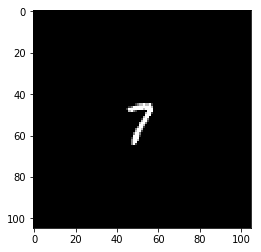

In [78]:
padded_img = padded_img.reshape(-1,20,105,105,1)
plot(padded_img[7][9].reshape(105,105))

(10, 20, 105, 105, 1)


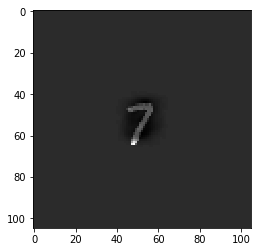

In [87]:
def normalise(X,drawers=20):
    X = X.reshape(-1,105*105)
    mu = np.mean(X,axis=0).reshape(1,11025)
    std = np.std(X,axis=0).reshape(1,11025)
    X = np.subtract(X,mu)
    X /= (std + 1e-100)
    X = X.reshape(-1,drawers,105,105,1)
    # X = X / 255.
    return X

normalised_padded_img = normalise(X = padded_img)
print(normalised_padded_img.shape)
plot(normalised_padded_img[7][9].reshape(105,105))

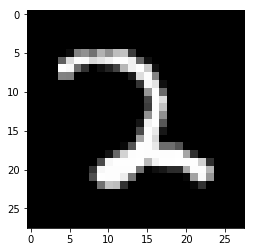

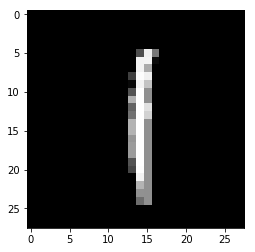

In [23]:
plot(imgs[2115])
plot(imgs[980])